In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

2.7.0


The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉
|Label|Description|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

This dataset is available directly in the `tf.keras.datasets` API and you load it like this:

In [16]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [17]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   3   0  25 128 123 105  72   5   0   1   4   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   2   0 114 155 147 154 172 142   0   0   0   0   2  44 144 165   0   2]
 [  0   0   0   0   0   0   0   0   0   0   4   0 110 147 148 160 157 200   5   0  80 149 167 185 177 133   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 123 145 142 175 154 207  11 116 239 186 184 178 166 141   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0 141 140 122 151 136 203  31 181 180 179 179 175 172 182   3   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 

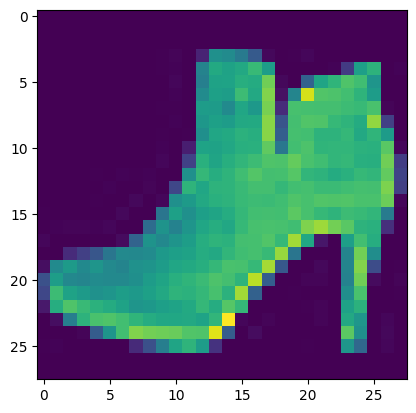

In [35]:
# Visualize your data
index = random.choice(range(59999)) # You can put between 0 to 59999 here

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [36]:
# Normalize the pixel values of the train and test images
training_images = training_images/255.0
test_images = test_images/255.0

In [37]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [44]:
# Declare sampleinputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


In [45]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.4963 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3747 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3353 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.3121 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.2902 - accuracy: 0.8928


In [47]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 826us/step - loss: 0.3467 - accuracy: 0.8743


[0.34666895866394043, 0.8743000030517578]

In [51]:
# Exercise 1
classifications = model.predict(test_images)

print(classifications[0])
print(np.argmax(classifications[0]))
print(test_labels[0])

[5.9562630e-05 3.8281449e-08 3.7804421e-05 4.9050794e-07 3.6895010e-06 9.8551977e-03 9.4535171e-05 5.0445117e-02 5.4619442e-05 9.3944889e-01]
9
9


In [55]:
# Excercise 2 512-neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 5)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.4724
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3573
Epoch 3/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.3214
Epoch 4/5
1875/1875 [==============================] - 1s 558us/step - loss: 0.2991
Epoch 5/5
313/313 [==============================] - 0s 747us/step - loss: 0.3567
0.3566604554653168
9
9


In [56]:
# Excercise 3 1024-neurons
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 5)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 968us/step - loss: 0.4754
Epoch 2/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.3579
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3219
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967
Epoch 5/5
313/313 [==============================] - 0s 542us/step - loss: 0.3323
0.33231157064437866
9
9


In [57]:
# Excerise 5 Add layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 5)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.4686
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3554
Epoch 3/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.3207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2969
Epoch 5/5
313/313 [==============================] - 0s 568us/step - loss: 0.3484
0.34836310148239136
9
9


In [60]:
# Exercise 6
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 15)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/15
1875/1875 [==============================] - 2s 788us/step - loss: 0.4670
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3570
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3183
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2818
Epoch 6/15
1875/1875 [==============================] - 2s 883us/step - loss: 0.2651
Epoch 7/15
1875/1875 [==============================] - 1s 761us/step - loss: 0.2507
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2417
Epoch 9/15
1875/1875 [==============================] - 2s 924us/step - loss: 0.2307
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2195
Epoch 11/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2133
Epoch 12/15
1875/1875 [==============================] - 3s 1ms/step - loss: 

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 30)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4679
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3569
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3201
Epoch 4/30
1875/1875 [==============================] - 2s 891us/step - loss: 0.2961
Epoch 5/30
1875/1875 [==============================] - 2s 803us/step - loss: 0.2782
Epoch 6/30
1875/1875 [==============================] - 2s 896us/step - loss: 0.2636
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2413
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2313
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2209
Epoch 11/30
1875/1875 [==============================] - 2s 943us/step - loss: 0.2126
Epoch 12/30
1875/1875 [==============================] - 2s 980us/step - loss

In [62]:
# Exercise 7
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs= 30)

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/30
1875/1875 [==============================] - 1s 595us/step - loss: 4.1698
Epoch 2/30
1875/1875 [==============================] - 1s 614us/step - loss: 0.5409
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5096
Epoch 4/30
1875/1875 [==============================] - 2s 946us/step - loss: 0.4997
Epoch 5/30
1875/1875 [==============================] - 1s 633us/step - loss: 0.4880
Epoch 6/30
1875/1875 [==============================] - 1s 755us/step - loss: 0.4786
Epoch 7/30
1875/1875 [==============================] - 2s 972us/step - loss: 0.4540
Epoch 8/30
1875/1875 [==============================] - 1s 583us/step - loss: 0.4458
Epoch 9/30
1875/1875 [==============================] - 1s 581us/step - loss: 0.4526
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4485
Epoch 11/30
1875/1875 [==============================] - 2s 843us/step - loss: 0.4497
Epoch 12/30
1875/1875 [==============================] - 2s 1ms/ste

In [67]:
# Exercise 8 Callback

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >=0.6):
            print('\nReached 60% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs= 5, callbacks=[callbacks])

print(model.evaluate(test_images, test_labels))

classifications = model.predict(test_images)

print(np.argmax(classifications[0]))
print(test_labels[0])

Epoch 1/5
1857/1875 [============================>.] - ETA: 0s - loss: 0.4752 - accuracy: 0.8299
Reached 60% accuracy so cancelling training!
313/313 [==============================] - 0s 684us/step - loss: 0.4531 - accuracy: 0.8334
[0.4530821740627289, 0.8334000110626221]
9
9


# references

[Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

[Sequential](https://keras.io/api/models/sequential/)

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)

[Dense](https://keras.io/api/layers/core_layers/dense/)

[ReLU](https://keras.io/api/layers/activations/#relu-function)

[Softmax](https://keras.io/api/layers/activations/#softmax-function)